In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
main_data = digits['data']
targets = digits['target']

In [6]:
len(main_data)

1797

In [7]:
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r , interpolation = 'nearest')
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()

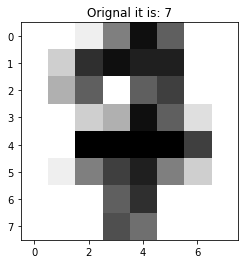

In [8]:
view_digit(17)

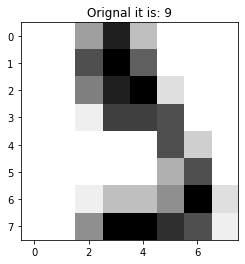

In [9]:
view_digit(19)

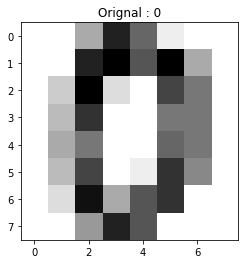

In [10]:
number = 0
plt.imshow(main_data[number].reshape(8,8,1) , cmap = plt.cm.gray_r)
plt.title('Orignal : '+ str(digits.target[number]))
plt.show()
#printing image from numbers

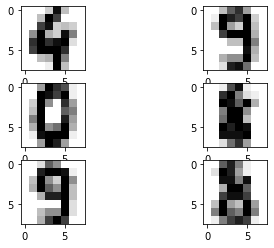

In [11]:
%matplotlib inline

plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

In [12]:
from sklearn import svm
svc = svm.SVC(gamma=0.001 , C = 100.)

In [13]:
svc.fit(main_data[:1790] , targets[:1790])

SVC(C=100.0, gamma=0.001)

In [14]:
predictions = svc.predict(main_data[1791:])

In [15]:
predictions , targets[1791:]

(array([4, 9, 0, 8, 9, 8]), array([4, 9, 0, 8, 9, 8]))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(criterion = 'gini')

In [18]:
dt.fit(main_data[:1600] , targets[:1600])

DecisionTreeClassifier()

In [19]:
predictions2 = dt.predict(main_data[1601:])

In [23]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.metrics import confusion_matrix

In [25]:
accuracy_score(targets[1601:] , predictions2)

0.8010204081632653

In [27]:
confusion_matrix(targets[1601:] , predictions2)

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 1,  0, 14,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  3,  1, 10,  1,  2,  0,  4,  1,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  1,  0, 17,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  1, 19,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  1,  0, 15,  0,  1],
       [ 1,  2,  1,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  1, 16]], dtype=int64)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rc = RandomForestClassifier(n_estimators = 150)

In [30]:
rc.fit(main_data[:1500] , targets[:1500])

RandomForestClassifier(n_estimators=150)

In [31]:
predictions3 = rc.predict(main_data[1501:])

In [32]:
accuracy_score(targets[1501:] , predictions3)

0.918918918918919